<a href="https://colab.research.google.com/github/Aditya270504/Netflix-Movies-and-TV-Shows-Clustering-with-Content-Recommendation-System/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

**2. Data Loading and Information**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
original_df = pd.read_csv('/content/drive/MyDrive/Netflix Movies and TV Shows/netflix_titles.csv')
df = original_df.copy()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


**3. Data Preprocessing**

In [ ]:
# Handle missing and duplicated data
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df.dropna(axis = 0, inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df.shape

(8790, 12)

In [ ]:
df.duplicated().value_counts()

,count
False,8790


In [ ]:
df.country.value_counts()

,count
country,
United States,2809
India,972
Unknown,829
United Kingdom,418
Japan,243
...,...
"Romania, Bulgaria, Hungary",1
"Uruguay, Guatemala",1
"France, Senegal, Belgium",1


In [ ]:
df['country'] = df['country'].apply(lambda x: x.split(',')[0])

In [ ]:
df.country.value_counts()

,count
country,
United States,3202
India,1008
Unknown,829
United Kingdom,627
Canada,271
...,...
Namibia,1
Senegal,1
Luxembourg,1


**4. Exploratory Data Analysis (EDA)**

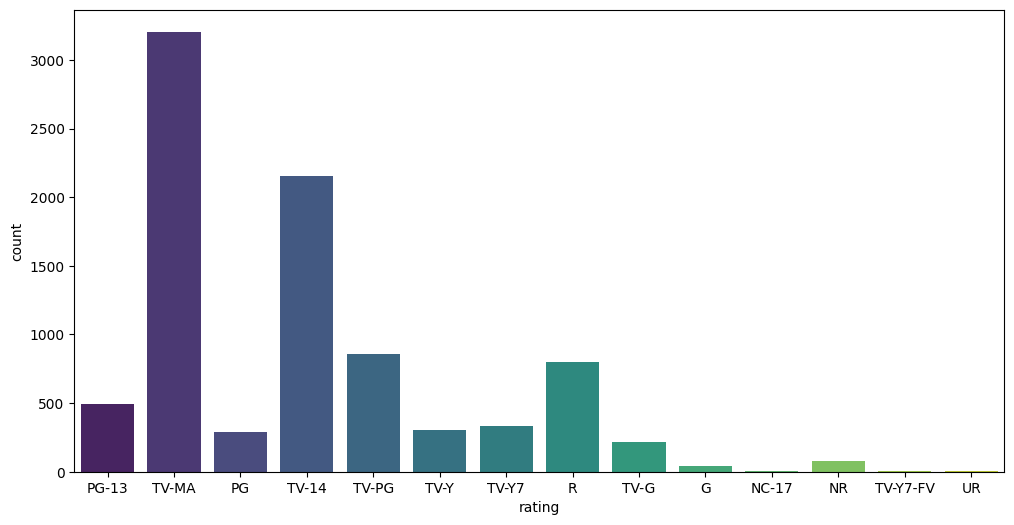

In [ ]:
# Rating distribution visualization
plt.figure(figsize=(12,6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.show()

In [ ]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
# Simplify rating categories
rating_map = {'PG-13':'Teens',
              'TV-MA':'Adults',
              'PG':'Older Kids',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'R':'Adults',
              'TV-G':'Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'NR':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Young Adults', 'Kids'],
      dtype=object)

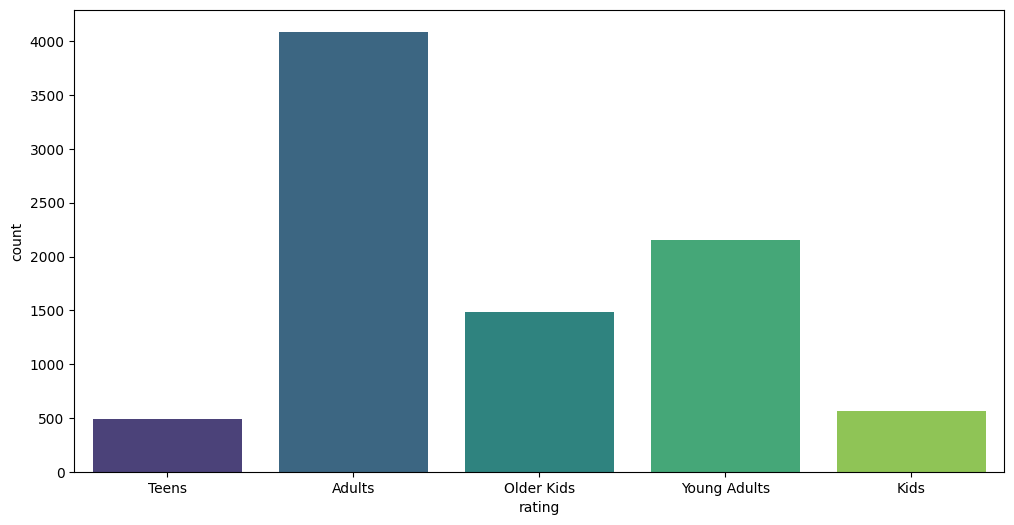

In [ ]:
# Rating distribution visualization after simplyfying
plt.figure(figsize=(12,6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.show()

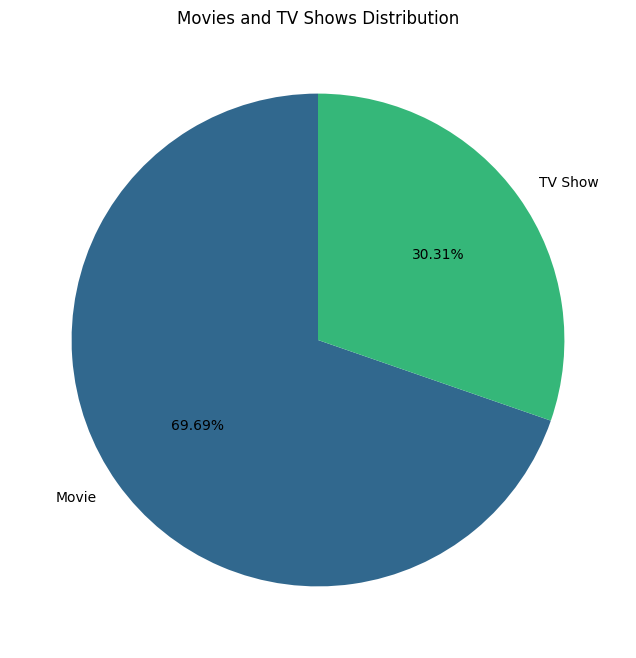

In [ ]:
type_counts = df['type'].value_counts()

# Type distribution visualization
plt.figure(figsize=(8,8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.2f%%', startangle=90, colors=sns.color_palette("viridis", len(type_counts)))
plt.ylabel('')
plt.title('Movies and TV Shows Distribution')
plt.show()

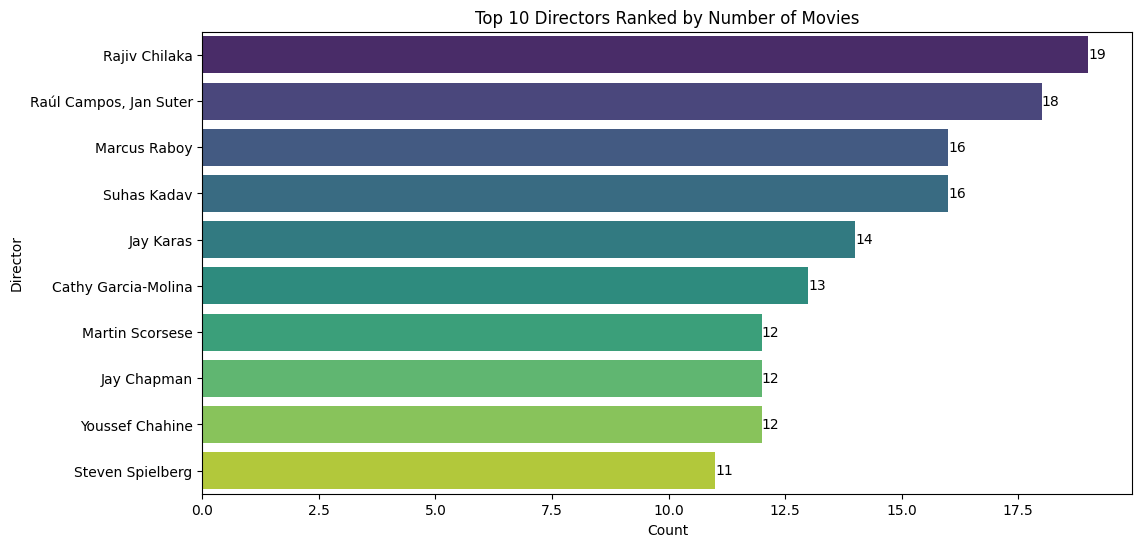

In [ ]:
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().nlargest(10)
top_directors = top_directors.reset_index()

# Top 10 Directors distribution visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='director', data=top_directors, palette="viridis",orient='h')
for index, value in enumerate(top_directors['count']):
    plt.text(value, index, str(value), va='center')
plt.xlabel('Count')
plt.ylabel('Director')
plt.title('Top 10 Directors Ranked by Number of Movies')
plt.show()

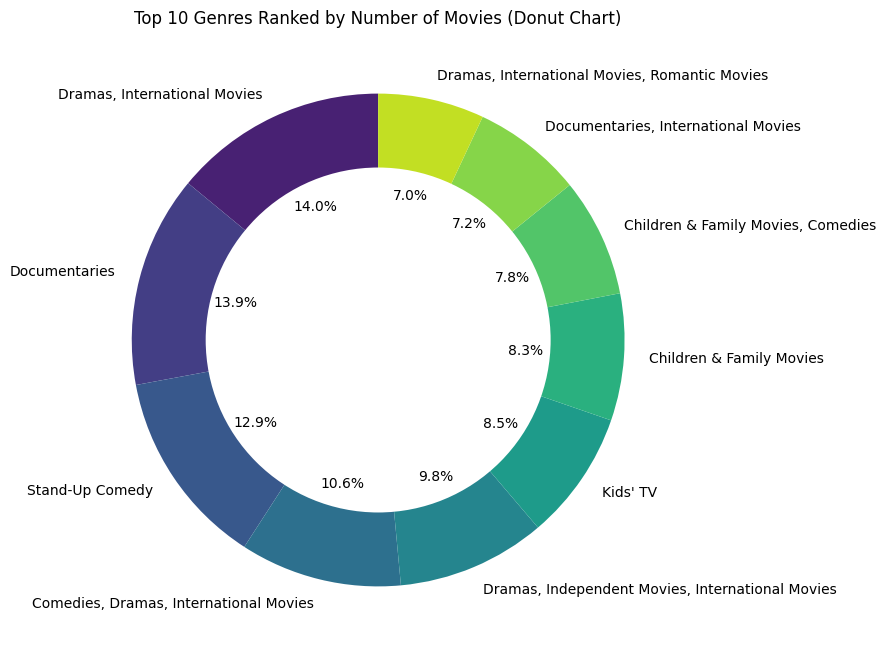

In [ ]:
top_genres = df['listed_in'].value_counts().nlargest(10)
top_genres = top_genres.reset_index()

# Top 10 Genres distribution visualization
plt.figure(figsize=(8, 8))
plt.pie(top_genres['count'], labels=top_genres['listed_in'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(top_genres)))
centre_circle = plt.Circle((0, 0), 0.70, color='white', fc='white', linewidth=0)
plt.gca().add_artist(centre_circle)
plt.title('Top 10 Genres Ranked by Number of Movies (Donut Chart)')
plt.show()


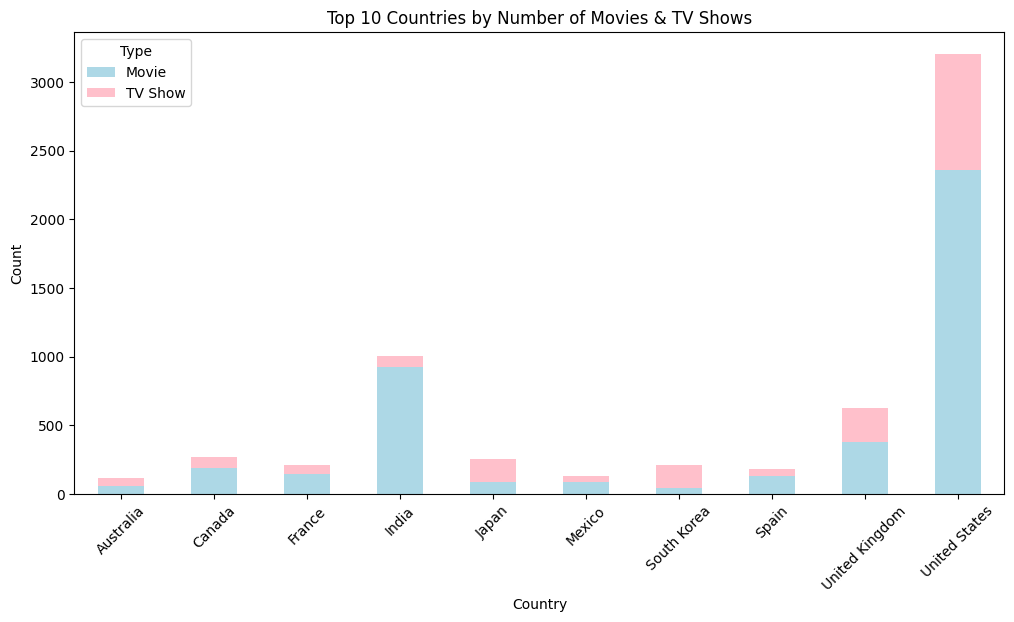

In [ ]:
top_countries = df[(df['country'] != 'Unknown')]['country'].value_counts().nlargest(10).index
country_type_counts = df[df['country'].isin(top_countries)]
country_type_counts = country_type_counts.groupby(['country', 'type']).size().unstack(fill_value=0)

# Top 10 Countries distribution visualization
country_type_counts.plot(kind='bar', stacked=True, figsize=(12,6), color=['lightblue', 'pink'])
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Number of Movies & TV Shows')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.show()

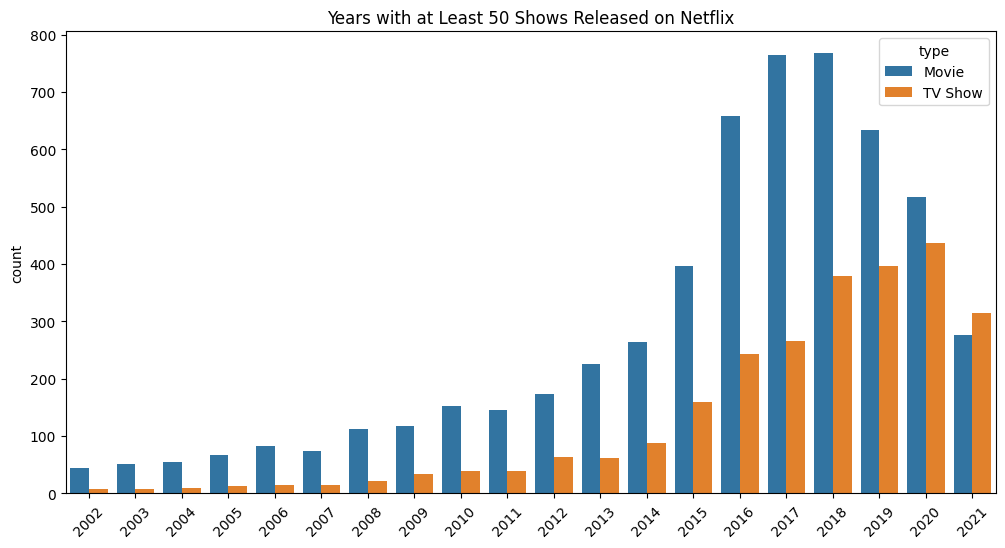

In [ ]:
year_shows = df['release_year'].value_counts()
year_shows = year_shows[year_shows >= 50].index

year_counts = df[df['release_year'].isin(year_shows)]

# Years distribution visualization
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', data=year_counts, hue='type', order=sorted(year_shows))
plt.title('Years with at Least 50 Shows Released on Netflix')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

**5. Data Processing for Clustering**

In [ ]:
df1 = original_df.copy()

In [ ]:
df1['content_clustering_attribute'] = ( df1['listed_in'] +' ' + df1['description'])
df1['content_clustering_attribute'][0]

'Documentaries As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'

In [ ]:
import unicodedata

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
df1['content_clustering_attribute'] = remove_non_ascii(df1['content_clustering_attribute'])
df1['content_clustering_attribute'][0]

'Documentaries As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def remove_stopwords(text):
    """Function to remove stopwords from a given text."""
    words = text.split()

    lowercase_words = [word.lower() for word in words if word.lower() not in sw]

    return " ".join(lowercase_words)

In [ ]:
df1['content_clustering_attribute'] = df1['content_clustering_attribute'].apply(remove_stopwords)
df1['content_clustering_attribute'][0]

'documentaries father nears end life, filmmaker kirsten johnson stages death inventive comical ways help face inevitable.'

In [ ]:
import string

def remove_punctuation(text):
    '''a function for removing punctuation'''
    translation_table = str.maketrans('', '', string.punctuation)
    return text.translate(translation_table)

In [ ]:
df1['content_clustering_attribute'] = df1['content_clustering_attribute'].apply(remove_punctuation)
df1['content_clustering_attribute'][0]

'documentaries father nears end life filmmaker kirsten johnson stages death inventive comical ways help face inevitable'

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df1['content_clustering_attribute'] = lemmatize_verbs(df1['content_clustering_attribute'])
df1['content_clustering_attribute'][0]

'documentaries father nears end life filmmaker kirsten johnson stages death inventive comical ways help face inevitable'

In [ ]:
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()
df1['content_clustering_attribute'] = df1['content_clustering_attribute'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
df1['content_clustering_attribute'][0]

['documentaries',
 'father',
 'nears',
 'end',
 'life',
 'filmmaker',
 'kirsten',
 'johnson',
 'stages',
 'death',
 'inventive',
 'comical',
 'ways',
 'help',
 'face',
 'inevitable']

In [ ]:
content_clustering_data = df1['content_clustering_attribute']
content_clustering_data

,content_clustering_attribute
0,"[documentaries, father, nears, end, life, film..."
1,"[international, tv, shows, tv, dramas, tv, mys..."
2,"[crime, tv, shows, international, tv, shows, t..."
3,"[docuseries, reality, tv, feuds, flirtations, ..."
4,"[international, tv, shows, romantic, tv, shows..."
...,...
8802,"[cult, movies, dramas, thrillers, political, c..."
8803,"[kids, tv, korean, tv, shows, tv, comedies, li..."
8804,"[comedies, horror, movies, looking, survive, w..."
8805,"[children, family, movies, comedies, dragged, ..."


In [ ]:
# Apply TF-IDF to extract features
from sklearn.feature_extraction.text import TfidfVectorizer
def identity_tokenizer(text):
    return text

tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(content_clustering_data)
X

<8807x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 149388 stored elements in Compressed Sparse Row format>

In [ ]:
X.shape

(8807, 20000)

In [ ]:
type(X)

scipy.sparse._csr.csr_matrix

In [ ]:
X = X.toarray()

**6. Dimensionality Reduction (PCA)**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

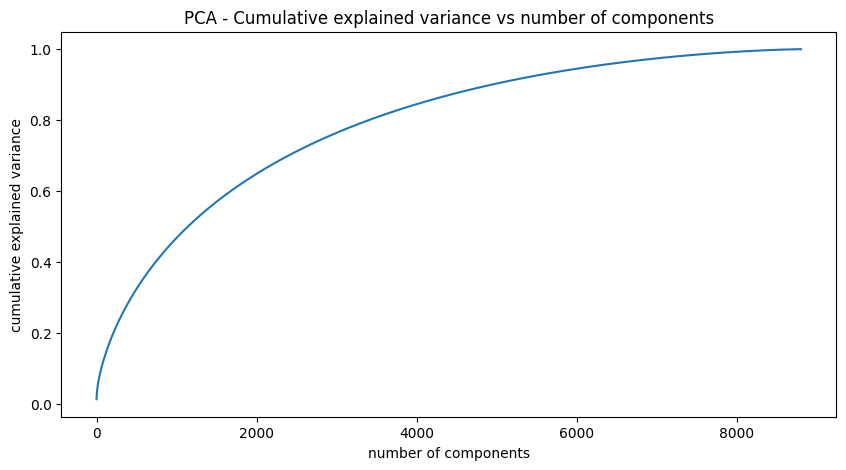

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [ ]:
x_pca = pca.transform(X)

In [ ]:
x_pca.shape

(8807, 4000)

**7. KMeans Clustering**

Text(0, 0.5, 'WCSS')

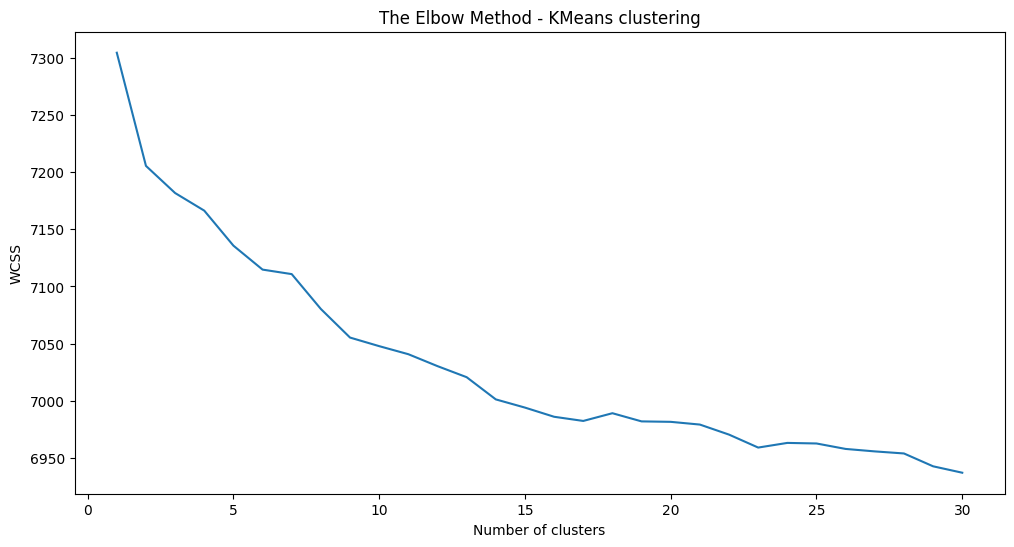

In [ ]:
from sklearn.cluster import KMeans


# Elbow method for finding optimal number of clusters
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=32)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

# Visualize WCSS to determine optimal clusters
number_clusters = range(1,31)
plt.figure(figsize=(12,6))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

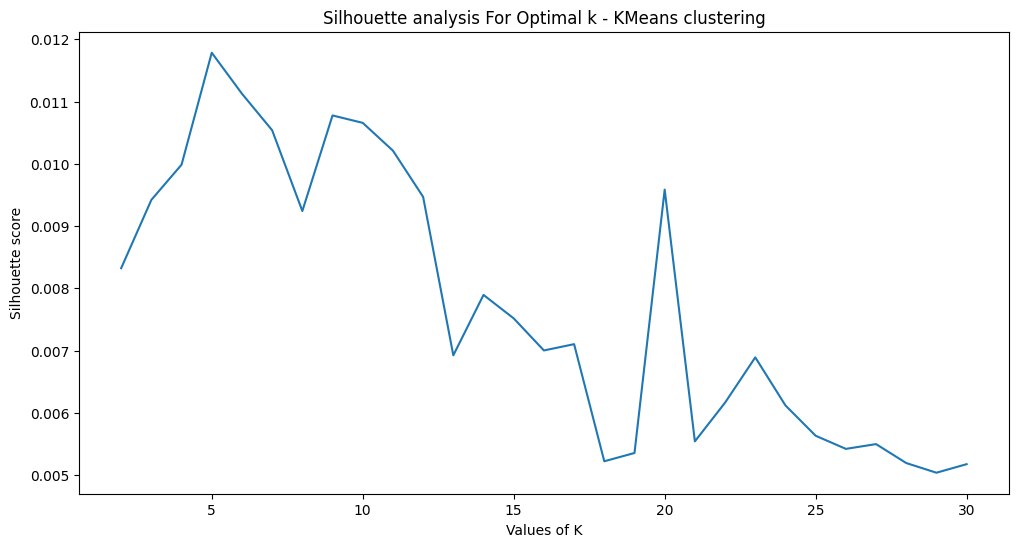

In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette analysis for optimal number of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=32)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_

  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

# Silhouette analysis for optimal number of clusters
plt.figure(figsize=(12,6))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
best_num_clusters = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]
print(f"Optimal number of clusters: {best_num_clusters}")
print(f"Maximum Silhouette Score: {max(silhouette_avg)}")

Optimal number of clusters: 5
Maximum Silhouette Score: 0.011783824687975578


In [ ]:
kmeans = KMeans(n_clusters=best_num_clusters,init='k-means++',random_state=32)
kmeans.fit(x_pca)

KMeans(n_clusters=5, random_state=32)

In [ ]:
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(7135.637698746561, 0.011783824687975578)


In [ ]:
df1['kmeans_cluster'] = kmeans.labels_

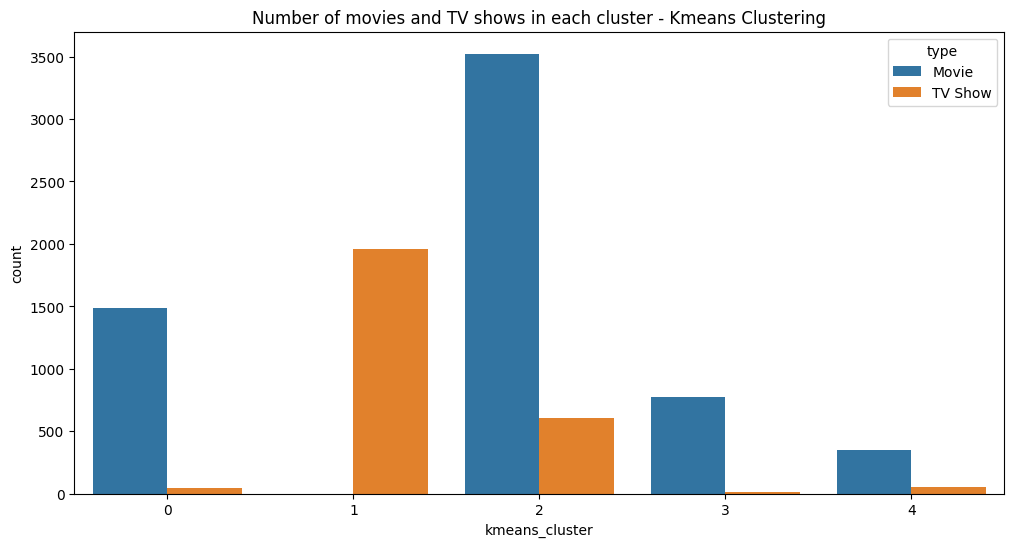

In [ ]:
# Visualize K-Means Cluster distribution
plt.figure(figsize=(12,6))
sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
plt.show()

**8. Hierarchical Clustering**

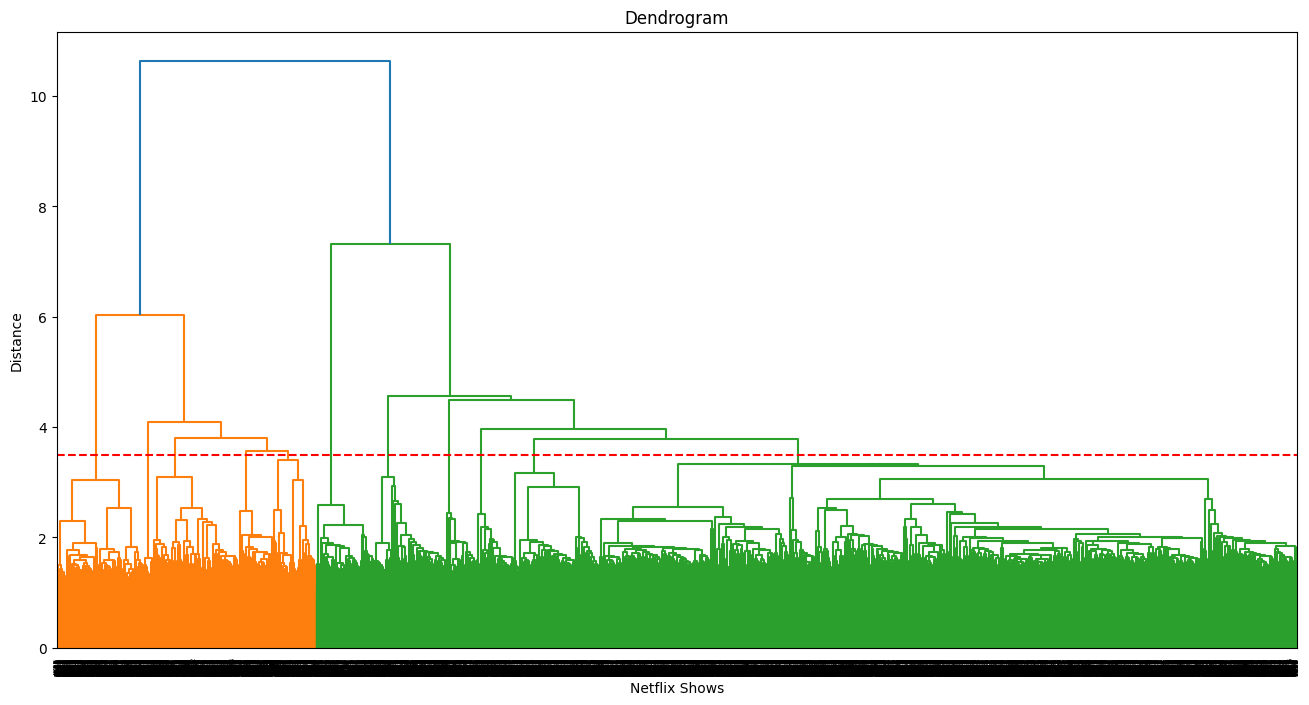

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Dendrogram to determine number of clusters
plt.figure(figsize=(16, 8))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.5, color='r', linestyle='--')

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=11, linkage='ward')
hierarchical.fit_predict(x_pca)

array([1, 3, 3, ..., 1, 7, 1])

In [ ]:
df1['hierarchical_cluster'] = hierarchical.labels_

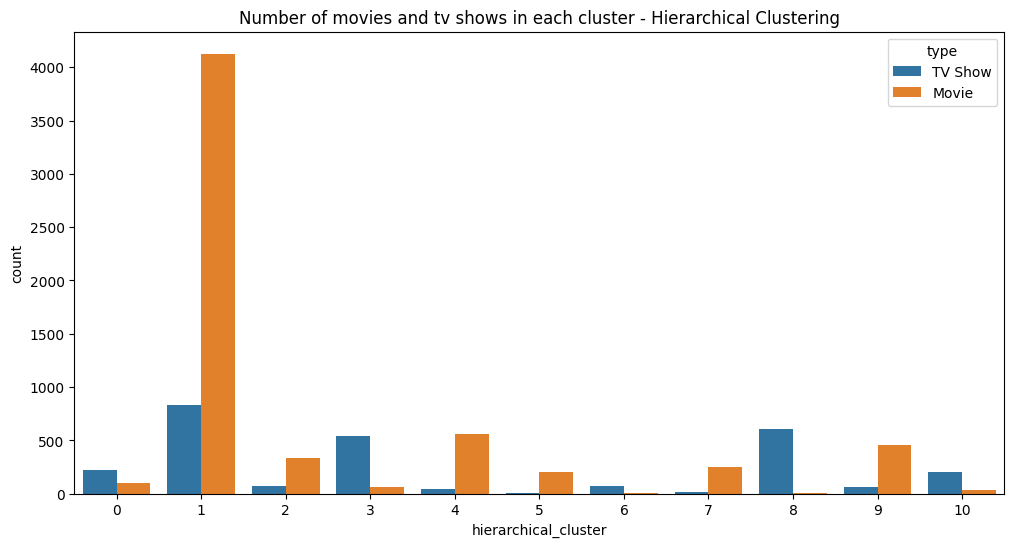

In [ ]:
# Visualize Hierarchial Cluster distribution
plt.figure(figsize=(12,6))
sns.countplot(x='hierarchical_cluster',data=df1, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
plt.show()

**9. Content Recommendation System**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

content_recommender_df = df1.copy()

In [ ]:
# Prepare data for content recommendation
content_recommender_df['show_id'] = content_recommender_df.index

In [ ]:
def convert(lst):
  return ' '.join(lst)

content_recommender_df['content_clustering_attribute'] = content_recommender_df['content_clustering_attribute'].apply(lambda x: convert(x))

In [ ]:
content_recommender_df.set_index('title',inplace=True)

In [ ]:
# Compute cosine similarity
CV = CountVectorizer()
converted_matrix = CV.fit_transform(content_recommender_df['content_clustering_attribute'])

In [ ]:
cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
cosine_similarity.shape

(8807, 8807)

In [ ]:
indices = pd.Series(content_recommender_df.index)

# Function to recommend shows based on title and description
def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    for i in top10:
      recommend_content.append(list(content_recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content
  except:
    return 'Invalid Entry'

In [ ]:
recommend_10('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['The OA',
 'Midnight Mass',
 'Nightflyers',
 'Star-Crossed',
 'Hemlock Grove',
 'Warrior Nun',
 'Scream',
 'Manifest',
 'Helix',
 'Anjaan: Special Crimes Unit']

In [ ]:
recommend_10('Kota Factory')

If you liked 'Kota Factory', you may also enjoy:



['Cheese in the Trap',
 'O-Negative, Love Can’t Be Designed',
 'College Romance',
 'Queen of No Marriage',
 'Before 30',
 'Little Things',
 'Triad Princess',
 'Feels Like Ishq',
 'Teresa',
 'Somewhere Only We Know']

In [ ]:
recommend_10('Lucifer')

If you liked 'Lucifer', you may also enjoy:



['The Good Cop',
 'Beauty & the Beast',
 'Jack Taylor',
 'Day and Night',
 'Behzat Ç.',
 'Dramaworld',
 'Lilyhammer',
 'Hidden Worlds',
 'Better Than Us',
 'Tunnel']